In [1]:
%cd C:\Users\yukir\Documents\GitHub\Text_Mining\py

from nlp_processing import *
from text_preprocessing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\mega_trend

C:\Users\yukir\Documents\GitHub\Text_Mining\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5765732783289967234
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9945628377473621705
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16096214777808987638
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9750975085382423496
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\io\matlab\mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


C:\Users\yukir\Documents\Monicas_workspace\mega_trend


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib_inline\config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


Text(0.5, 1.0, '안녕')

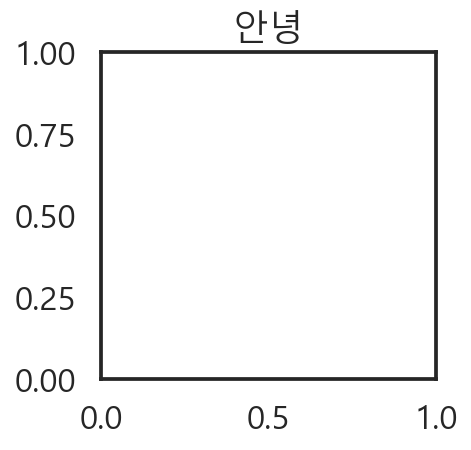

In [2]:
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [3]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [4]:
from tqdm import tqdm
import os
import sys

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    text = text.replace(".", " ").strip() 
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
    text = re.sub(pattern=pattern, repl='', string=text) 
    return text 
    
def get_nouns(tokenizer, sentence): 
    """ 단어의 길이가 2이상인 일반명사(NNG),
     고유명사(NNP), 외국어(SL)만을 반환한다. 
     :param tokenizer: 
     :param sentence: :return: """ 
    tagged = tokenizer.nouns(sentence)
    nouns = [s for s in tagged if len(s)>1] 
     
    return nouns 
     
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)

### DATA LOAD

In [7]:
### 레이블링 된 자료를 가지고, 필요한 주제 넣어서 진행(그냥하면 어려울 수도 있음)
 
 
f = open('C:\\Users\\yukir\\Documents\\Monicas_workspace\\mega_trend\\0214_pre.txt')
lines=f.readlines()

clean_example = []

for i in tqdm (lines):
    k = clean_text(i)
    # text = re.sub('\n','',k)
    # print(text)
    k = k.strip()
    k = k.replace('\n','')
    p = re.compile("[^0-9]")
    k = ("".join(p.findall(k)))
    if k==[] or '':
        pass
    elif k=='':
        pass
    elif len(k)<=2:
        pass
    # # elif '제약' in k:  ##########주제정할때 사용#################
    #     clean_example.append(k)##########주제정할때 사용#################
    else:   ##########주제 필요 없을때 사용#################
        clean_example.append(k)

len(clean_example)

100%|██████████| 1514/1514 [00:00<00:00, 94629.04it/s]


1243

In [8]:
## 오래걸리니까 조심
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
        
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('211tokenized_TFIDF.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)


from tqdm import tqdm 
if __name__ == '__main__':
     # df = pd.read_csv('negative.csv', index_col = 0)
     processed_data = tokenize(clean_example) # description 부분을 토크나이징 한다. 
     
     # 토큰 분리한 데이터를 저장 
     save_processed_data(processed_data)

100%|██████████| 1243/1243 [00:05<00:00, 208.21it/s]


### TF_IDF

In [9]:
clean_example[:10]

['맥킨지는 년까지 건강에 중대한 영향을 미칠 수 있는 가지 유망 혁신을 선정  가장 중요한 문제를 해결할 수 있는 기술을 중심으로 전문가 인터뷰 각 질병에 대한 생물학적 이해 그리고 새로운 기술을 개발하기 위한 자금조달 등을 통해 이들 혁신의 영향을 결정',
 '가지 유망 혁신은',
 '오믹스및분자기술',
 '제약기술',
 '세포치료및재생의학',
 '혁신적백신',
 '혁신기술',
 '연결된인지장치',
 '전자약',
 '로봇공학 인공기관']

In [10]:
detokenized_doc = []
for i in range(len(processed_data)):
    t = ' '.join(processed_data[i])
    try: 
        if '인공 지능' in t:
            t = t.replace('인공 지능', '인공')
            detokenized_doc.append(t)
        elif '지능' in t:
            pass
        elif '오믹스 분자 기술' in t:
            t = t.replace('오믹스 분자 기술', '오믹스분자기술')
            detokenized_doc.append(t)
        elif '제약 기술' in t:
            t = t.replace('제약 기술', '제약기술')
            detokenized_doc.append(t)
        else:
            detokenized_doc.append(t)

    except:
        detokenized_doc.append(t)
    

import pandas as pd
df = pd.DataFrame({'detokenized_doc':detokenized_doc})
df = df.dropna()
print(df.shape)
df.head()

#df 내용 수시로 확인하면서 띄어쓰기 처리할 것

(1243, 1)


,detokenized_doc
0,맥킨 건강 영향 가지 유망 혁신 선정 가장 문제 해결 기술 중심 전문가 인터뷰 질병...
1,가지 유망 혁신
2,오믹스분자기술
3,제약기술
4,세포 치료 재생의학


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=0,                        # minimum reqd occurences of a word 
                             stop_words=stopwords_kor,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[가-힣0-9]{1,}',  # num chars > 3
                             max_features=2000,             # max number of uniq words
                            ) 
data_vectorized = vectorizer.fit_transform(df['detokenized_doc'])
data_vectorized.shape # TF-IDF 행렬의 크기 확인

(1243, 1804)

In [12]:
feature_vector = vectorizer.fit_transform(detokenized_doc)
print(feature_vector.shape)
vocab = vectorizer.get_feature_names()
print(len(vocab))


(1243, 1804)
1804


In [13]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
# df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 1804)


In [14]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False)

,0
혁신,62.825583
기술,58.735968
인공,55.638124
치료,48.376157
의료,43.912325
...,...
유전학,0.177991
실질,0.177991
생물학자,0.177991
최첨단,0.177991


In [15]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
1799,흑인,0.543875
1800,흡수,0.241280
1801,희귀,0.789721
1802,희귀질환,2.080127
1803,희망,0.308551


In [16]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(1804, 2)
(1804, 2)


In [17]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use

,words,freq
1730,혁신,62.825583
232,기술,58.735968
1124,인공,55.638124
1522,치료,48.376157
1074,의료,43.912325
...,...,...
1052,유전학,0.177991
853,실질,0.177991
686,생물학자,0.177991
1494,최첨단,0.177991


In [18]:
#저장 후 확인하면서 관련 질환 육안 extraction필요

df_use.to_excel('terms_frequency.xlsx', encoding='utf-8')

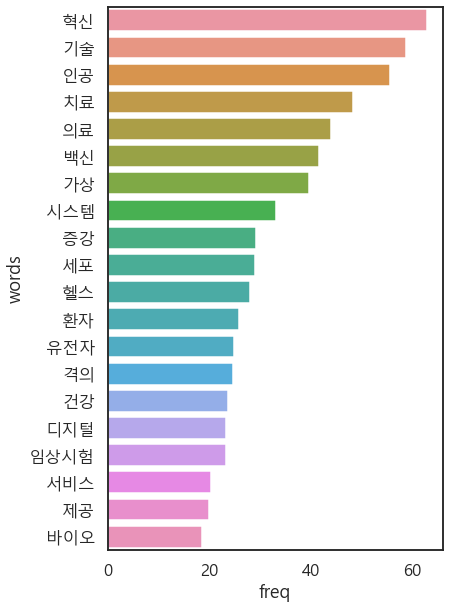

In [19]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,10))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


### WORD CLOUD

In [20]:
words_v2 = []

for num, i in enumerate (df_use.words):
#   try:
#     if '화이트' in i:
#       pass
#     elif '하니' in i:
#       pass
#     elif '줄평' in i:
#       pass
#     elif '군데' in i:
#       pass
#     else :
    words_v2.append((i, int(df_use.freq[num])))
#   except: 
#     pass
    
    # words_v2.append((i, int(df_use.freq[num])))
  # words_v2.append((i, int(df_use.freq[num])))

words_v2[:5]
words_clean = words_v2.copy()

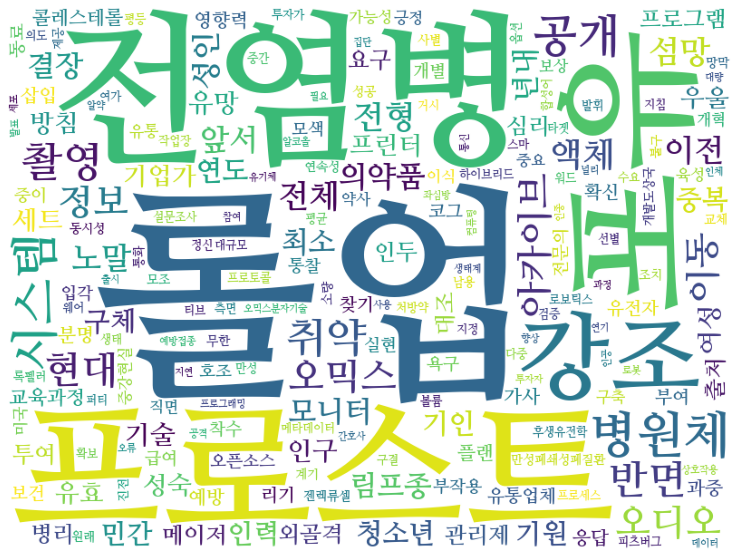

In [21]:
from apyori import apriori
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud

from nltk.corpus import stopwords  
stopwords_kor = stopwords.words('korean')

#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = stopwords_kor,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')

plt.imshow(cloud)
plt.show()
# plt.savefig('seoul_less6.png')

###나오는 워드클라우드보고 stopwords_kor설정

### NETWORK

In [22]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [23]:
network_df = pd.DataFrame({'org':clean_example})
network_df.head()

,org
0,맥킨지는 년까지 건강에 중대한 영향을 미칠 수 있는 가지 유망 혁신을 선정 가장 ...
1,가지 유망 혁신은
2,오믹스및분자기술
3,제약기술
4,세포치료및재생의학


In [24]:
def make_noun(x):
    x = okt.nouns(x)
    return x

network_df['nouns'] = network_df['org'].apply(make_noun)
network_df.head()

,org,nouns
0,맥킨지는 년까지 건강에 중대한 영향을 미칠 수 있는 가지 유망 혁신을 선정 가장 ...,"[맥킨, 년, 건강, 영향, 수, 가지, 유망, 혁신, 선정, 가장, 문제, 해결,..."
1,가지 유망 혁신은,"[가지, 유망, 혁신]"
2,오믹스및분자기술,"[오믹스, 및, 분자, 기술]"
3,제약기술,"[제약, 기술]"
4,세포치료및재생의학,"[세포, 치료, 및, 재생의학]"


In [25]:
final_clean = []

for i in network_df.nouns:
    clean_list = []
    for k in i:
        k = k.replace('인공', '인공지능')
        if k =='지능':
            pass
        elif k =='세':
            pass
        elif k =='외':
            pass
        elif k not in stopwords_kor:
            clean_list.append(k)
        
    final_clean.append(clean_list)

network_df.nouns = final_clean

##final clean 수시로 확인하면서 stop_words update, 삭제할거 삭제

In [26]:
from apyori import apriori
result = (list(apriori(network_df.nouns, min_support = 0.04)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.04)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
32,(혁신),0.239743,"[((), (혁신), 0.23974255832662913, 1.0)]",1
6,(기술),0.222848,"[((), (기술), 0.22284794851166534, 1.0)]",1
29,(치료),0.163315,"[((), (치료), 0.16331456154465004, 1.0)]",1
20,(의료),0.152856,"[((), (의료), 0.15285599356395815, 1.0)]",1
37,"(기술, 혁신)",0.137570,"[((), (기술, 혁신), 0.13757039420756234, 1.0), ((기...",2


In [27]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
37,"(기술, 혁신)",0.137570,"[((), (기술, 혁신), 0.13757039420756234, 1.0), ((기...",2
34,"(가상, 증강)",0.079646,"[((), (가상, 증강), 0.07964601769911504, 1.0), ((가...",2
39,"(시스템, 혁신)",0.077233,"[((), (시스템, 혁신), 0.07723250201126307, 1.0), ((...",2
35,"(가상, 헬스)",0.070796,"[((), (가상, 헬스), 0.07079646017699115, 1.0), ((가...",2
40,"(증강, 헬스)",0.062751,"[((), (증강, 헬스), 0.06275140788415125, 1.0), ((증...",2


In [28]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)

In [29]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:107: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


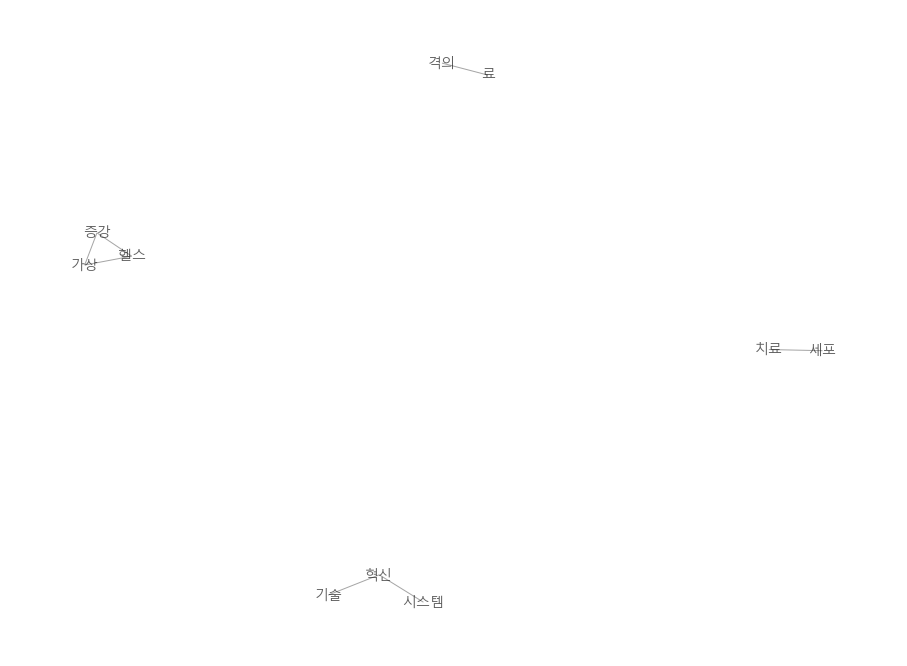

In [30]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

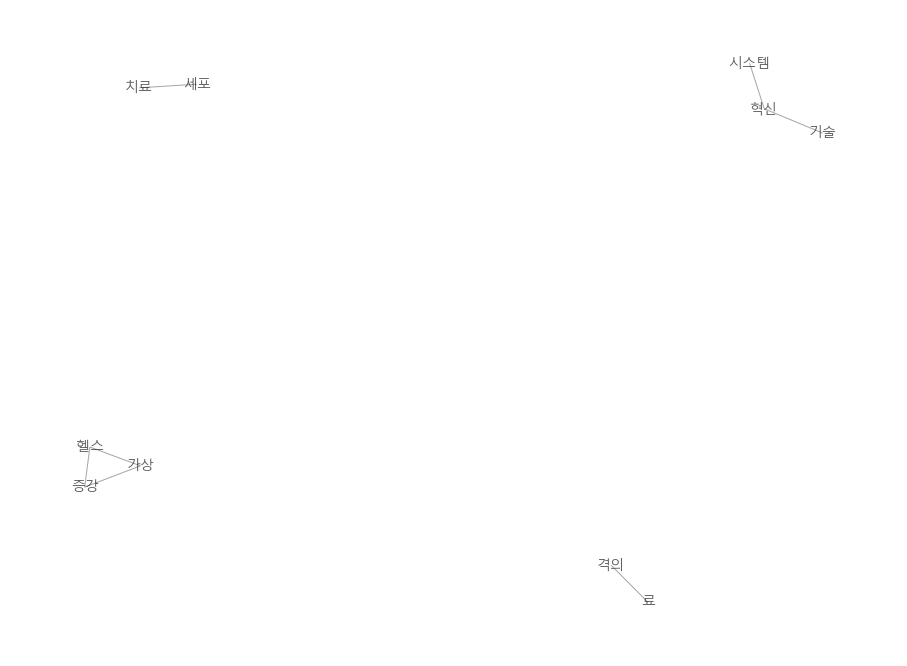

In [31]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

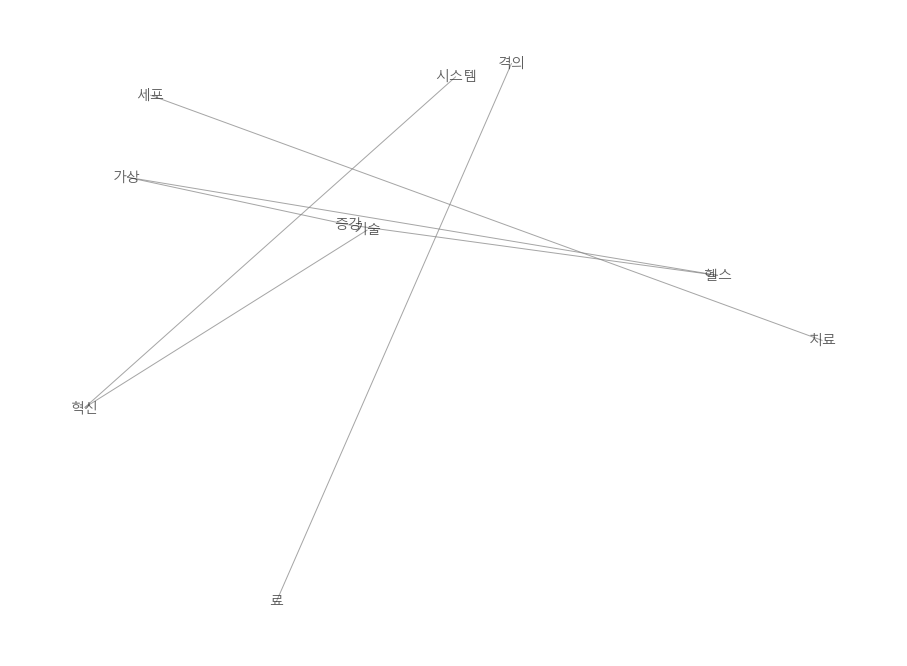

In [32]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning

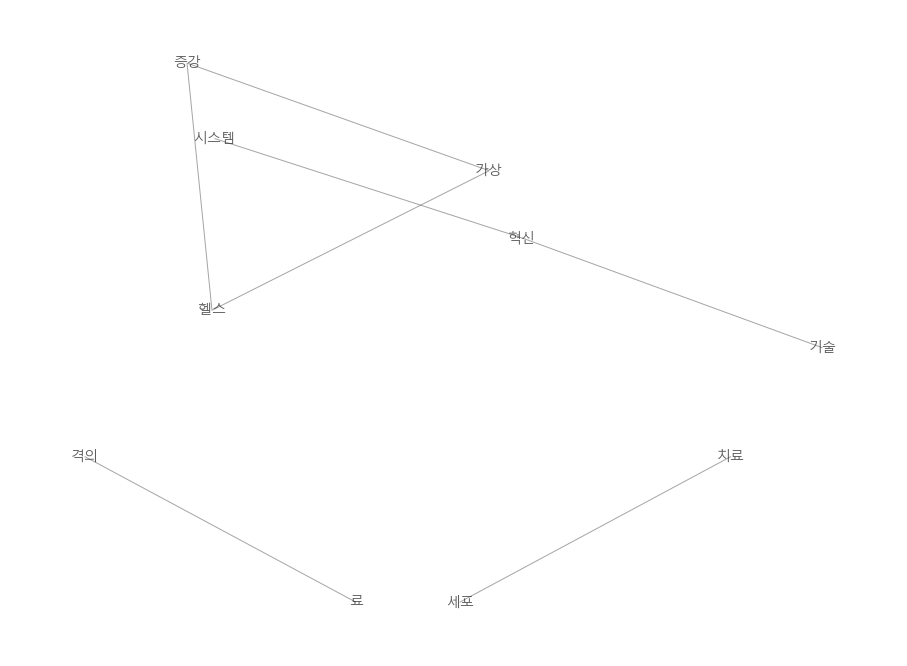

In [33]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)